In [28]:
from sklearn.model_selection import train_test_split

def stratified_splitter(df, label_col, valid_pct=0.2, seed=None):
    # Extract labels
    labels = df[label_col]
    
    # Perform a stratified split to maintain label proportions
    train_idxs, valid_idxs = train_test_split(range(len(df)), test_size=valid_pct, 
                                              stratify=labels, random_state=seed)
    
    return train_idxs, valid_idxs

C:\Users\Joshua\anaconda3\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


['Blazer', 'Blouse', 'Cardigan', 'Coat', 'Culottes', 'Dress', 'Hoodie', 'Jacket', 'Jeans', 'Jersey', 'Joggers', 'Shorts', 'Skirt', 'Sweater', 'Sweatpants', 'Sweatshorts', 'Tee', 'Top']


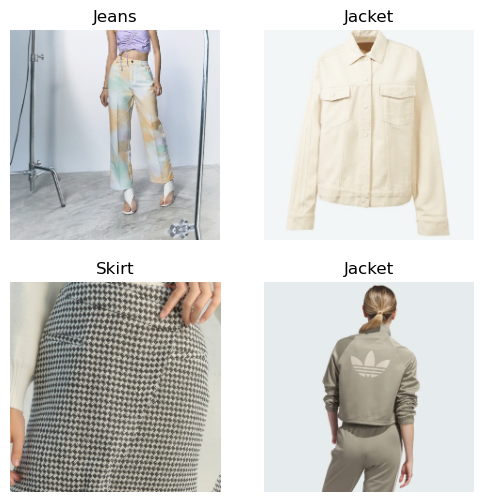

In [29]:
from fastai.vision.all import *

# Path to the folder containing images
path = Path('.')

# Load your dataset
df = pd.read_csv('image_labels.csv')

# Create the DataLoaders
data = ImageDataLoaders.from_df(df, 
                                path='.',  # Adjust as necessary
                                fn_col=0, 
                                label_col=1, 
                                valid_pct=0.2, 
                                seed=42,  # Adjust as necessary
                                item_tfms=Resize(460), 
                                batch_tfms=aug_transforms(size=224, min_scale=0.75),
                                splitter=lambda: stratified_splitter(df, label_col=1, valid_pct=0.2, seed=42))

# Check the vocabulary
print(data.vocab)
#show batch
data.show_batch(max_n=4)


In [30]:
# Recreate the learner with the same architecture
learn = cnn_learner(data, resnet34, metrics=accuracy)

C:\Users\Joshua\anaconda3\Lib\site-packages\fastai\vision\learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


In [31]:
# Load the saved model

model = torch.load('stage-1_resnet34.pkl')
learn.model = model

In [32]:
# Fine-tune the model
learn.fine_tune(epochs=6)


epoch,train_loss,valid_loss,accuracy,time
0,12.865808,10.262919,0.000000,00:14


epoch,train_loss,valid_loss,accuracy,time
0,13.139284,10.435428,0.000000,00:13
1,13.172511,10.516541,0.000000,00:14
2,13.216504,10.718340,0.000000,00:14
3,13.303673,10.806966,0.000000,00:14


In [33]:
learn.export('updated_model.pkl')
learn.export(r'C:\Users\Joshua\Documents\GitHub\TopCareFashion\backend\ML\updated_model.pkl')


In [ ]:
# C:\Users\Joshua\Documents\GitHub\TopCareFashion\backend\ML